In [1]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Importing packages...


In [2]:
print('Reading data...')
dfTrain = pd.read_csv('LoanStats2015.csv')
list(dfTrain)

Reading data...


['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_uti

In [3]:
dfTrain = dfTrain[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'loan_status','total_rec_int']]

In [4]:
dfTrain.head(6)

,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,term,emp_length,int_rate,annual_inc,dti,delinq_2yrs,...,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,loan_status,total_rec_int
0,14000,14000,14000.0,B3,36 months,4 years,9.80%,100000.0,15.97,0,...,36.10%,14,0.0,0.0,0.0,0,NaN,0,Current,1826.33
1,10000,10000,10000.0,D2,60 months,< 1 year,16.59%,30000.0,30.84,0,...,26.60%,36,0.0,0.0,0.0,0,78.0,0,Fully Paid,757.52
2,16000,16000,16000.0,B1,60 months,5 years,8.49%,62000.0,28.92,0,...,51.20%,24,0.0,0.0,0.0,0,61.0,0,Current,2103.02
3,10000,10000,10000.0,A5,36 months,2 years,7.91%,40100.0,10.81,0,...,45%,7,0.0,0.0,0.0,0,NaN,0,Current,1045.97
4,8650,8650,8650.0,E3,36 months,8 years,19.89%,55000.0,25.49,0,...,46%,19,0.0,0.0,0.0,0,NaN,0,Fully Paid,540.49
5,7000,7000,7000.0,A4,36 months,10+ years,7.49%,59000.0,13.06,1,...,24.20%,34,0.0,0.0,0.0,0,NaN,0,Current,695.86


In [5]:
'''cleanup'''
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
print('Transform done.')

Transform: term...
Transform: sub_grade...
Transform done.


In [6]:
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')

print('Transform: emp_length...')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')


Transform: term...
Transform: emp_length...


In [7]:
print('Transform: int_rate...')
dfTrain['int_rate'].replace(to_replace='%', value='', regex=True, inplace=True)
dfTrain['int_rate'] = pd.to_numeric(dfTrain['int_rate'], errors='coerce')
print('Transform: revol_util...')
dfTrain['revol_util'].replace(to_replace='%', value='', regex=True, inplace=True)
dfTrain['revol_util'] = pd.to_numeric(dfTrain['revol_util'], errors='coerce')

Transform: int_rate...
Transform: revol_util...


In [8]:
dfTrain.head(6)

,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,term,emp_length,int_rate,annual_inc,dti,delinq_2yrs,...,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,loan_status,total_rec_int
0,14000,14000,14000.0,13,36,4.0,9.80,100000.0,15.97,0,...,36.1,14,0.0,0.0,0.0,0,NaN,0,Current,1826.33
1,10000,10000,10000.0,32,60,0.0,16.59,30000.0,30.84,0,...,26.6,36,0.0,0.0,0.0,0,78.0,0,Fully Paid,757.52
2,16000,16000,16000.0,11,60,5.0,8.49,62000.0,28.92,0,...,51.2,24,0.0,0.0,0.0,0,61.0,0,Current,2103.02
3,10000,10000,10000.0,5,36,2.0,7.91,40100.0,10.81,0,...,45.0,7,0.0,0.0,0.0,0,NaN,0,Current,1045.97
4,8650,8650,8650.0,43,36,8.0,19.89,55000.0,25.49,0,...,46.0,19,0.0,0.0,0.0,0,NaN,0,Fully Paid,540.49
5,7000,7000,7000.0,4,36,10.0,7.49,59000.0,13.06,1,...,24.2,34,0.0,0.0,0.0,0,NaN,0,Current,695.86


In [9]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mths_since_last_major_derog', 'emp_length','total_rec_int']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: mths_since_last_major_derog
Imputation with Median: emp_length
Imputation with Median: total_rec_int
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [10]:
dfTrain.head(6)

,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,term,emp_length,int_rate,annual_inc,dti,delinq_2yrs,...,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,loan_status,total_rec_int
0,14000,14000,14000.0,13,36,4.0,9.80,100000.0,15.97,0,...,36.1,14,0.0,0.0,0.0,0,45.0,0,Current,1826.33
1,10000,10000,10000.0,32,60,0.0,16.59,30000.0,30.84,0,...,26.6,36,0.0,0.0,0.0,0,78.0,0,Fully Paid,757.52
2,16000,16000,16000.0,11,60,5.0,8.49,62000.0,28.92,0,...,51.2,24,0.0,0.0,0.0,0,61.0,0,Current,2103.02
3,10000,10000,10000.0,5,36,2.0,7.91,40100.0,10.81,0,...,45.0,7,0.0,0.0,0.0,0,45.0,0,Current,1045.97
4,8650,8650,8650.0,43,36,8.0,19.89,55000.0,25.49,0,...,46.0,19,0.0,0.0,0.0,0,45.0,0,Fully Paid,540.49
5,7000,7000,7000.0,4,36,10.0,7.49,59000.0,13.06,1,...,24.2,34,0.0,0.0,0.0,0,45.0,0,Current,695.86


In [11]:
train_target = pd.DataFrame(dfTrain['loan_status'])
selected_cols = ['emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med','total_acc','total_rec_int','open_acc']
finalTrain = dfTrain[selected_cols]

In [12]:
finalTrain.loc[:,'annual_inc'].values

array([ 100000.,   30000.,   62000., ...,   64400.,   35000.,  100000.])

In [13]:
LTI = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']

In [14]:
finalTrain.loc[:,'loan_to_inc'] = finalTrain.annual_inc/finalTrain.funded_amnt_inv

c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
finalTrain.head(6)

,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,acc_now_delinq,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,total_acc,total_rec_int,open_acc,loan_to_inc
0,4.0,14000,14000,14000.0,13,9.80,100000.0,15.97,31.0,0,0.0,0.0,0.0,0,14,1826.33,7,7.142857
1,0.0,10000,10000,10000.0,32,16.59,30000.0,30.84,78.0,0,0.0,0.0,0.0,0,36,757.52,19,3.000000
2,5.0,16000,16000,16000.0,11,8.49,62000.0,28.92,39.0,0,0.0,0.0,0.0,0,24,2103.02,10,3.875000
3,2.0,10000,10000,10000.0,5,7.91,40100.0,10.81,31.0,0,0.0,0.0,0.0,0,7,1045.97,4,4.010000
4,8.0,8650,8650,8650.0,43,19.89,55000.0,25.49,31.0,0,0.0,0.0,0.0,0,19,540.49,18,6.358382
5,10.0,7000,7000,7000.0,4,7.49,59000.0,13.06,23.0,0,0.0,0.0,0.0,0,34,695.86,10,8.428571


In [16]:
finalTrain.loc[:,'bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])

c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1

c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
finalTrain.head(6)

,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,acc_now_delinq,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,total_acc,total_rec_int,open_acc,loan_to_inc,bad_state
0,4.0,14000,14000,14000.0,13,9.80,100000.0,15.97,31.0,0,0.0,0.0,0.0,0,14,1826.33,7,7.142857,0.0
1,0.0,10000,10000,10000.0,32,16.59,30000.0,30.84,78.0,0,0.0,0.0,0.0,0,36,757.52,19,3.000000,0.0
2,5.0,16000,16000,16000.0,11,8.49,62000.0,28.92,39.0,0,0.0,0.0,0.0,0,24,2103.02,10,3.875000,0.0
3,2.0,10000,10000,10000.0,5,7.91,40100.0,10.81,31.0,0,0.0,0.0,0.0,0,7,1045.97,4,4.010000,0.0
4,8.0,8650,8650,8650.0,43,19.89,55000.0,25.49,31.0,0,0.0,0.0,0.0,0,19,540.49,18,6.358382,0.0
5,10.0,7000,7000,7000.0,4,7.49,59000.0,13.06,23.0,0,0.0,0.0,0.0,0,34,695.86,10,8.428571,0.0


In [19]:
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']

c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\main\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), train_size=0.70, test_size=0.30)

In [21]:
np.shape(X_train)


(294766, 21)

In [22]:
np.shape(y_train)

(294766, 1)

In [24]:
print('Learning...')
from sklearn import svm
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.ravel())

Learning...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
print('hello')

hello


In [30]:
y_pred = clf.predict(X_test)

In [34]:
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))


Accuracy: 54.3865620720%


Counter({'Current': 116085, 'Charged Off': 8872, 'Fully Paid': 1372})
Counter({'Current': 58999, 'Fully Paid': 46499, 'Charged Off': 16830, 'Late (31-120 days)': 2229, 'In Grace Period': 1343, 'Late (16-30 days)': 420, 'Default': 9})


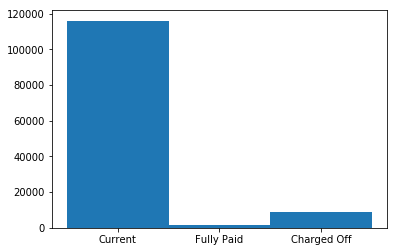

In [55]:
import collections as col
import matplotlib.pyplot as plt
cnt = col.Counter()
cnt_act = col.Counter()
for word in list(y_pred):
    cnt[word] += 1
for word in list(np.array(y_test).flatten()):
    cnt_act[word] += 1

print(cnt)
print(cnt_act)
labels, values = zip(*cnt.items())
labels_act, values_act = zip(*cnt_act.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

In [56]:
print('Learning...')
from sklearn import svm
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train.ravel())
y_pred_ten = clf.predict(X_test)

Learning...


In [60]:
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred_ten)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
cnt_ten = col.Counter()
cnt_act = col.Counter()
for word in list(y_pred_ten):
    cnt_ten[word] += 1
for word in list(np.array(y_test).flatten()):
    cnt_act[word] += 1

print(cnt_ten)
print(cnt)
print(cnt_act)

Accuracy: 73.7922408948%
Counter({'Current': 83753, 'Fully Paid': 33363, 'Charged Off': 9197, 'Late (31-120 days)': 16})
Counter({'Current': 116085, 'Charged Off': 8872, 'Fully Paid': 1372})
Counter({'Current': 58999, 'Fully Paid': 46499, 'Charged Off': 16830, 'Late (31-120 days)': 2229, 'In Grace Period': 1343, 'Late (16-30 days)': 420, 'Default': 9})
